In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [ ]:
# Loading the given 'diabetes' dataset
data = pd.read_csv('diabetes.csv')

# Printing the head of the dataset to gain some information
print(data.head())

   -0.294118  0.487437  0.180328  -0.292929         0  0.00149028  -0.53117  \
0  -0.882353 -0.145729  0.081967  -0.414141  0.000000   -0.207153 -0.766866   
1  -0.058824  0.839196  0.049180   0.000000  0.000000   -0.305514 -0.492741   
2  -0.882353 -0.105528  0.081967  -0.535354 -0.777778   -0.162444 -0.923997   
3   0.000000  0.376884 -0.344262  -0.292929 -0.602837    0.284650  0.887276   
4  -0.411765  0.165829  0.213115   0.000000  0.000000   -0.236960 -0.894962   

   -0.0333333  0.1  
0   -0.666667    1  
1   -0.633333    0  
2    0.000000    1  
3   -0.600000    0  
4   -0.700000    1  


In [ ]:
# Converting numpy array to TensorFlow tensor
data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

# Printing information about the tensor
print(data_tensor[:5])
print(data_tensor.shape)

tf.Tensor(
[[-0.882353  -0.145729   0.0819672 -0.414141   0.        -0.207153
  -0.766866  -0.666667   1.       ]
 [-0.0588235  0.839196   0.0491803  0.         0.        -0.305514
  -0.492741  -0.633333   0.       ]
 [-0.882353  -0.105528   0.0819672 -0.535354  -0.777778  -0.162444
  -0.923997   0.         1.       ]
 [ 0.         0.376884  -0.344262  -0.292929  -0.602837   0.28465
   0.887276  -0.6        0.       ]
 [-0.411765   0.165829   0.213115   0.         0.        -0.23696
  -0.894962  -0.7        1.       ]], shape=(5, 9), dtype=float32)
(758, 9)


## Preprocessing the data

In [ ]:
# Checking for null values
null_values = data.isnull().sum()
print("Null values:",null_values)

Null values: -0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64


In [ ]:
# Checking if there are any duplicate rows
dup_rows = data.duplicated().sum()
print("Duplicate rows", dup_rows)

Duplicate rows 0


In [ ]:
#As the dataset do not have column names,I'm considering the last column as the target and the remaining columns as features
X = tf.constant(data.iloc[:, :-1].values, dtype=tf.float32)
y = tf.constant(data.iloc[:, -1].values, dtype=tf.float32)

# Printing information about the preprocessed data
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (758, 8)
y shape: (758,)


## Exploratory Data Analysis

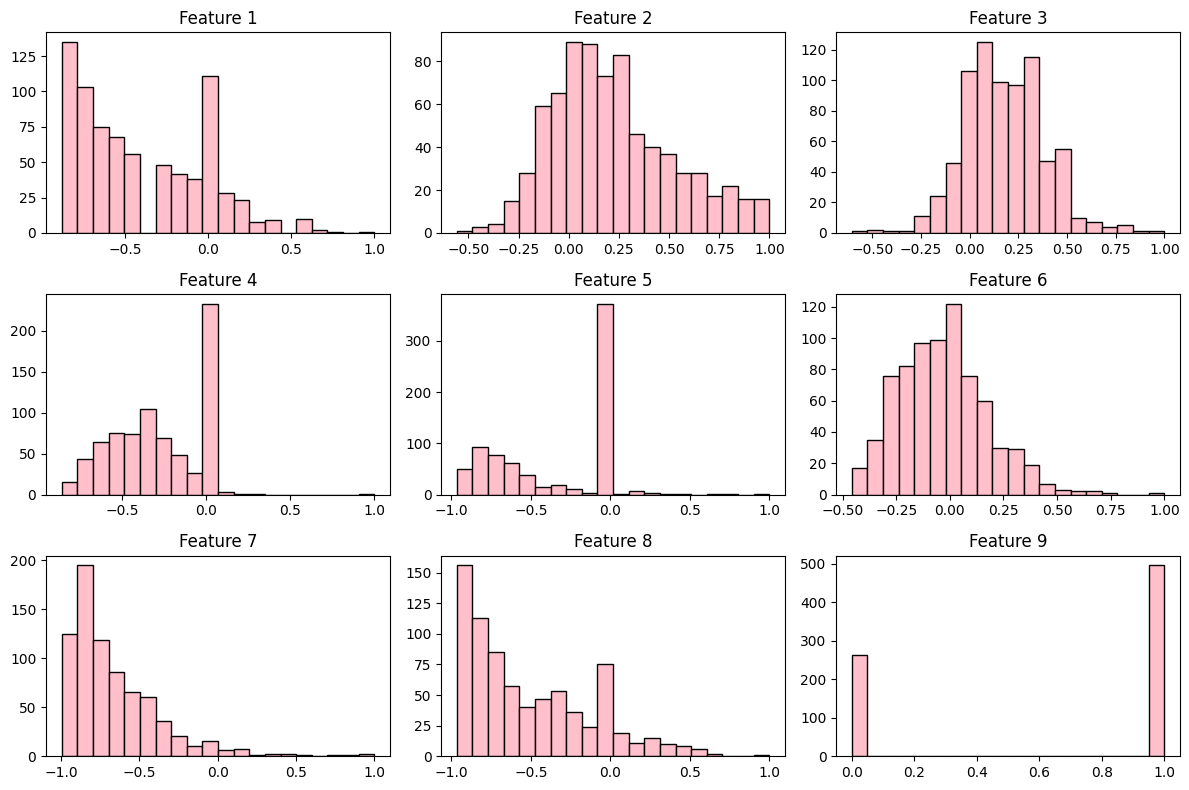

In [ ]:
# Calculate the number of features
no_of_features = data_tensor.shape[1]

# Plotting Histograms
plt.figure(figsize=(12, 8))
for i in range(no_of_features):
    plt.subplot(3, 3, i+1)
    plt.hist(data_tensor[:, i].numpy(), bins=20, color='pink', edgecolor='black')
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

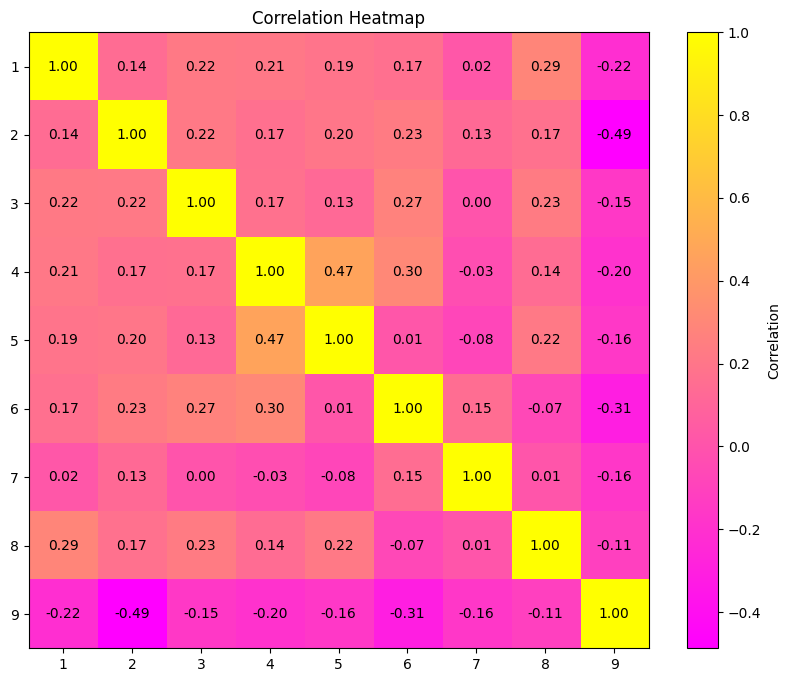

In [ ]:
#Correlation Map
data_tensor = tf.cast(data_tensor, dtype=tf.float64)

# Computing the correlation matrix manually
X_centered = data_tensor - tf.reduce_mean(data_tensor, axis=0)
covariance_matrix = 1 / (tf.cast(tf.shape(data_tensor)[0], dtype=tf.float64) - 1) * tf.matmul(tf.transpose(X_centered), X_centered)
std_dev = tf.sqrt(tf.linalg.diag_part(covariance_matrix))
correlation_matrix = covariance_matrix / (std_dev[:, None] * std_dev[None, :])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix.numpy(), cmap='spring', aspect='auto')

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f'{correlation_matrix[i, j]:.2f}', ha='center', va='center', color='black')

plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap')
plt.xticks(range(data_tensor.shape[1]), range(1, data_tensor.shape[1] + 1))
plt.yticks(range(data_tensor.shape[1]), range(1, data_tensor.shape[1] + 1))
plt.show()


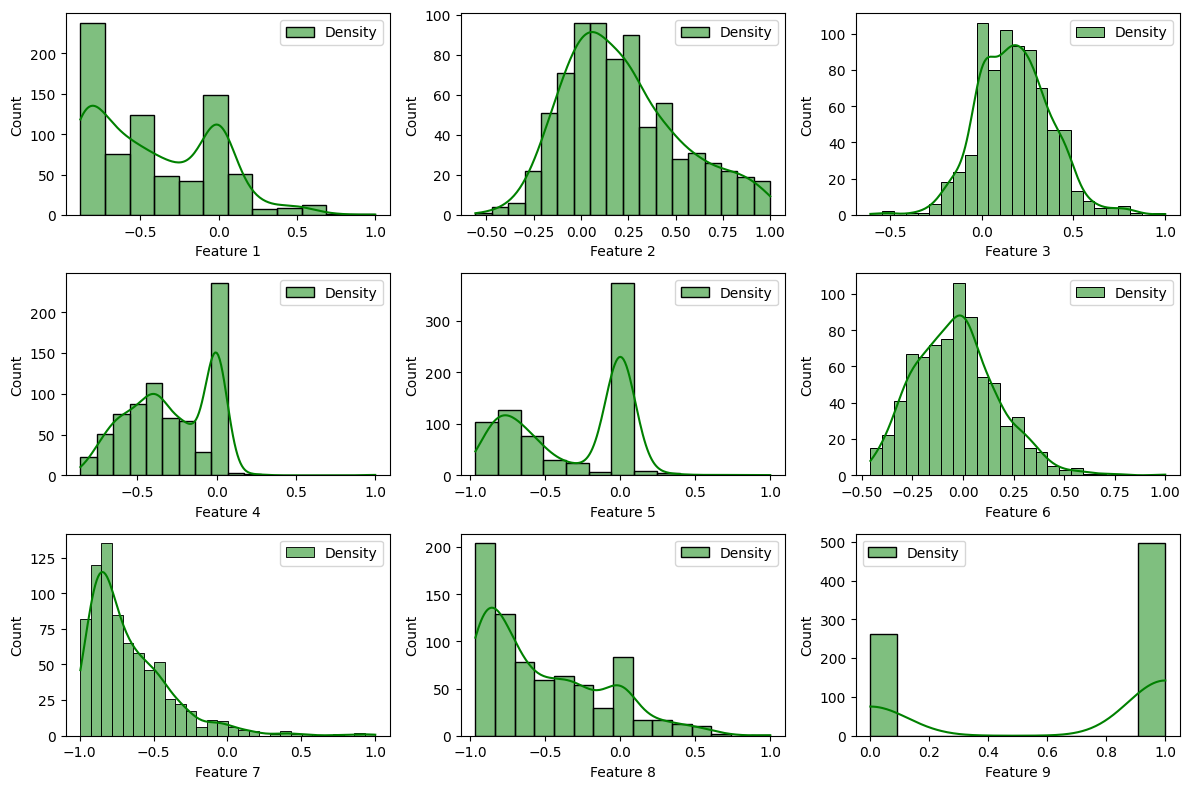

In [ ]:
# Density plot
plt.figure(figsize=(12, 8))
for i in range(data_tensor.shape[1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data_tensor[:, i].numpy(), color='Green', label='Density', kde=True)

    plt.xlabel(f'Feature {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()

## Splitting the dataset into Training and Testing datasets

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_tensor.numpy(), y.numpy(), test_size=0.2, random_state=42)

# Converting NumPy arrays back to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Printing the sizes of training and testing sets
print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 606
Testing data size: 152


## Neural Network Model with Keras

In [ ]:
# Convert DataFrame to TensorFlow tensors
inputs = tf.convert_to_tensor(data.iloc[:, :-1].values, dtype=tf.float32)
outputs = tf.convert_to_tensor(data.iloc[:, -1].values, dtype=tf.float32)

In [ ]:
# Create a linear model
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [ ]:
# Get results from an untrained model
linear_predictions = linear_model(inputs)

In [ ]:
# Compile the complex model
linear_model.compile(optimizer='SGD',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])



In [ ]:
# Fitting the model
linear_model.fit(inputs, outputs, epochs=10)

#Making the Predictions
predictions = linear_model.predict(inputs)

binary_predictions = tf.where(predictions > 0.5, 1.0, 0.0)

# Calculating the accuracy
accuracy = tf.reduce_mean(tf.cast(tf.equal(binary_predictions, outputs), tf.float32))
print("Accuracy:", accuracy.numpy())


Epoch 1/10
24/24 [==============================] - 0s 1ms/step - loss: 3.2479 - accuracy: 0.4024
Epoch 2/10
24/24 [==============================] - 0s 1ms/step - loss: 0.7343 - accuracy: 0.5554
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.6570
Epoch 4/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.6847
Epoch 5/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.6807
Epoch 6/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.7005
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7164
Epoch 8/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5576 - accuracy: 0.7309
Epoch 9/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.7348
Epoch 10/10
24/24 [==============================] - 0s 886us/step
Accuracy: 0.593671


### Hypothesis 1:

In [ ]:
#Using different functions and adding some layers
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='tanh', input_shape=(inputs.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling model1
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model1
model1.fit(inputs, outputs, epochs=70, batch_size=80, validation_split=0.2)

# Calculating accuracy of the Model1
accuracy1 = model1.evaluate(inputs, outputs)[1]
print("Accuracy:", accuracy1)

Epoch 1/70
8/8 [==============================] - 1s 21ms/step - loss: 0.6261 - accuracy: 0.6617 - val_loss: 0.6048 - val_accuracy: 0.6513
Epoch 2/70
8/8 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.6683 - val_loss: 0.5856 - val_accuracy: 0.6447
Epoch 3/70
8/8 [==============================] - 0s 5ms/step - loss: 0.5754 - accuracy: 0.6650 - val_loss: 0.5733 - val_accuracy: 0.6513
Epoch 4/70
8/8 [==============================] - 0s 5ms/step - loss: 0.5621 - accuracy: 0.6733 - val_loss: 0.5604 - val_accuracy: 0.6645
Epoch 5/70
8/8 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.6947 - val_loss: 0.5483 - val_accuracy: 0.7171
Epoch 6/70
8/8 [==============================] - 0s 5ms/step - loss: 0.5372 - accuracy: 0.7294 - val_loss: 0.5384 - val_accuracy: 0.7237
Epoch 7/70
8/8 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.7442 - val_loss: 0.5290 - val_accuracy: 0.7237
Epoch 8/70
8/8 [=================

<b>Hypothesis 1</b>: I have added 3 layers to make the intial model a bit more dense. I have used tanh, ReLu activation and Sigmoid functions for this purpose, Increased the epochs to 70, used a batch size of 80 and validation split is 20%. I wanted to experiment with different parameters. When the hypothesis is tested on the dataset it is observed that there is a good increase in the accuracy from 35% to 77%.<br>
<b>Reasoning</b>: Adding more layers definetely impacted the accuracy to improve.

### Hypothesis 2:

In [ ]:
# Adding different layers and different widths for each layer
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(inputs.shape[1],)),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling model2
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model2
model2.fit(inputs, outputs, epochs=50, batch_size=100, validation_split=0.2)

# Calculating accuracy of the Model2
accuracy2 = model2.evaluate(inputs, outputs)[1]
print("Accuracy:", accuracy2)

Epoch 1/50
7/7 [==============================] - 1s 24ms/step - loss: 0.6463 - accuracy: 0.6568 - val_loss: 0.6449 - val_accuracy: 0.6447
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6458 - accuracy: 0.6568 - val_loss: 0.6382 - val_accuracy: 0.6447
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6298 - accuracy: 0.6568 - val_loss: 0.6375 - val_accuracy: 0.6447
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6289 - accuracy: 0.6568 - val_loss: 0.6313 - val_accuracy: 0.6447
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6299 - accuracy: 0.6568 - val_loss: 0.6313 - val_accuracy: 0.6447
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6187 - accuracy: 0.6568 - val_loss: 0.6272 - val_accuracy: 0.6447
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6135 - accuracy: 0.6568 - val_loss: 0.6172 - val_accuracy: 0.6447
Epoch 8/50
7/7 [=================

<b>Hypothesis 2</b>: I have made the model more denser by adding layers. I have used sigmoid, linear, ReLU activation, linear and sigmoid functions with different number of neurons. Reduced the epochs to 50, used a batch size of 100 and validation split is 20%. Used Adam optimizer and Binary cross entropy loss fucntion. When the hypothesis is tested on the dataset the accuracy did not increase but got decreased a bit to 75%. It was almost same range as the previous<br>
<b>Reasoning</b>: Different layers might capture a different patterns but in this case this particular combination of different functions did not work as expected. Thus, the accuracy did not improve.

### Hypothesis 3

In [ ]:
# More Deeper and complex model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(inputs.shape[1],)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling model3
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model3
model3.fit(inputs, outputs, epochs= 120, batch_size=300)

# Calculating accuracy of the Model3
accuracy3 = model3.evaluate(inputs, outputs)[1]
print("Accuracy:", accuracy3)

Epoch 1/120
3/3 [==============================] - 1s 6ms/step - loss: 0.6641 - accuracy: 0.6544
Epoch 2/120
3/3 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6544
Epoch 3/120
3/3 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6544
Epoch 4/120
3/3 [==============================] - 0s 5ms/step - loss: 0.6420 - accuracy: 0.6544
Epoch 5/120
3/3 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.6544
Epoch 6/120
3/3 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.6544
Epoch 7/120
3/3 [==============================] - 0s 4ms/step - loss: 0.6346 - accuracy: 0.6544
Epoch 8/120
3/3 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.6544
Epoch 9/120
3/3 [==============================] - 0s 5ms/step - loss: 0.6170 - accuracy: 0.6544
Epoch 10/120
3/3 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.6544
Epoch 11/120
3/3 [===========

<b>Hypothesis 3</b>: I have made the model more denser by adding some more layers with different widths.Increased the epochs to 120, used a batch size of 300. Used Adam optimizer and Binary cross entropy loss fucntion. When the hypothesis is tested on the dataset the accuracy did not increase nor decrease. It was almost same<br>
<b>Reasoning</b>: Different layers and increased in the number of epochs did not possibly suit this dataset. This particular combination did not perform well for this particular dataset.

### Hypothesis 4:

In [ ]:
# Model having same function in all the layers
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(inputs.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

# Compiling model4
model4.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Training model4
model4.fit(inputs, outputs, epochs=1000)

# Calculating accuracy of the Model4
accuracy4 = model4.evaluate(inputs, outputs)[1]
print("Accuracy:", accuracy4)

Epoch 1/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.7488 - accuracy: 0.6491
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5509 - accuracy: 0.7018
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7177
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.7559
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7533
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.7586
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.7546
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7586
Epoch 9/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7625
Epoch 10/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7586

<b>Hypothesis 4</b>: I have reduced the layers. Used only ReLU activation function for all the layers but with different number of neurons.Increased the epochs to 1000. Used SGD optimizer and Binary cross entropy loss function. When the hypothesis is tested on the dataset the accuracy it decreased to 34%.<br>
<b>Reasoning</b>: Same layers with different width probably impacted the model in negative direction, also the SGD optimizer did not help in anyway, there by reducing the accuracy.

### Hypothesis 5:

In [ ]:
# Model with Kernel Initializers
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(inputs.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu',kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(8, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling model5
model5.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model5
model5.fit(inputs, outputs, epochs=1500)

# Calculating accuracy of the Model5
accuracy5 = model5.evaluate(inputs, outputs)[1]
print("Accuracy:", accuracy5)

Epoch 1/1500
24/24 [==============================] - 1s 2ms/step - loss: 0.6478 - accuracy: 0.6544
Epoch 2/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6544
Epoch 3/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.6544
Epoch 4/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6544
Epoch 5/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6544
Epoch 6/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.6530
Epoch 7/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.6544
Epoch 8/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.6623
Epoch 9/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.6900
Epoch 10/1500
24/24 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7071

<b>Hypothesis 5</b>: I have changed the layers a bit from the previous model and I have used kernel initializers for each layer. Increased the epochs to 1500. Used Adam optimizer and Binary cross entropy loss function. When the hypothesis is tested on the dataset the accuracy it increased to 81%.<br>
<b>Reasoning</b>: Different layers always worked for this dataset but finding a right combination is all that matters! Also Adam optimizer works better for this dataset than SGD. Using kernel initializers also proved out be good for the model's performance. So far this hypothesis has been the best in all of my experiments. I have also tried different combinations by changing widths, functions and epochs in this same model, but yielded a lower result or the same result as the previous models everytime. Thus, I have finally found a good combination which has given a better accuracy.